In [2]:
# Downloading Necessary libraries
!pip install tensor-dash

In [3]:
# Importing Necessary Libraries
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensordash.tensordash import Tensordash
import plotly.express as px
import json
import skimage.io as io
#user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("email")
#secret_value_1 = user_secrets.get_secret("pin")

In [4]:
# read datset
dataset = pd.read_csv('plant/train.csv')
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]

In [5]:
dataset.head()

image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

In [6]:
dataset.head(15)

image_id  healthy  multiple_diseases  rust  scab
0    Train_0        0                  0     0     1
1    Train_1        0                  1     0     0
2    Train_2        1                  0     0     0
3    Train_3        0                  0     1     0
4    Train_4        1                  0     0     0
5    Train_5        1                  0     0     0
6    Train_6        0                  1     0     0
7    Train_7        0                  0     0     1
8    Train_8        0                  0     0     1
9    Train_9        1                  0     0     0
10  Train_10        0                  0     1     0
11  Train_11        0                  0     0     1
12  Train_12        0                  0     0     1
13  Train_13        1                  0     0     0
14  Train_14        0                  0     1     0

In [7]:
dataset.tail()

image_id  healthy  multiple_diseases  rust  scab
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

In [8]:
dataset.tail(15)

image_id  healthy  multiple_diseases  rust  scab
1806  Train_1806        0                  0     0     1
1807  Train_1807        1                  0     0     0
1808  Train_1808        1                  0     0     0
1809  Train_1809        0                  0     0     1
1810  Train_1810        1                  0     0     0
1811  Train_1811        0                  0     1     0
1812  Train_1812        0                  0     0     1
1813  Train_1813        0                  0     1     0
1814  Train_1814        1                  0     0     0
1815  Train_1815        0                  1     0     0
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

In [9]:
dataset.columns

Index(['image_id', 'healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [10]:
len(dataset)

1821

In [11]:
dataset.shape

(1821, 5)

In [12]:
dataset.dtypes

image_id             object
healthy               int64
multiple_diseases     int64
rust                  int64
scab                  int64
dtype: object

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   image_id           1821 non-null   object
 1   healthy            1821 non-null   int64 
 2   multiple_diseases  1821 non-null   int64 
 3   rust               1821 non-null   int64 
 4   scab               1821 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 71.3+ KB


In [14]:
dataset.describe()

healthy  multiple_diseases         rust         scab
count  1821.000000        1821.000000  1821.000000  1821.000000
mean      0.283361           0.049973     0.341571     0.325096
std       0.450754           0.217948     0.474367     0.468539
min       0.000000           0.000000     0.000000     0.000000
25%       0.000000           0.000000     0.000000     0.000000
50%       0.000000           0.000000     0.000000     0.000000
75%       1.000000           0.000000     1.000000     1.000000
max       1.000000           1.000000     1.000000     1.000000

In [15]:
#checking for the missing values
dataset.isnull().sum()

image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64

In [16]:
 # Display True if it is a missing value and False if it is not
dataset.isna()

image_id  healthy  multiple_diseases   rust   scab
0        False    False              False  False  False
1        False    False              False  False  False
2        False    False              False  False  False
3        False    False              False  False  False
4        False    False              False  False  False
...        ...      ...                ...    ...    ...
1816     False    False              False  False  False
1817     False    False              False  False  False
1818     False    False              False  False  False
1819     False    False              False  False  False
1820     False    False              False  False  False

[1821 rows x 5 columns]

In [17]:
# Adding .jpg extension to every image_id
dataset['image_id'] = dataset['image_id']+'.jpg'

In [18]:
dataset

image_id  healthy  multiple_diseases  rust  scab
0        Train_0.jpg        0                  0     0     1
1        Train_1.jpg        0                  1     0     0
2        Train_2.jpg        1                  0     0     0
3        Train_3.jpg        0                  0     1     0
4        Train_4.jpg        1                  0     0     0
...              ...      ...                ...   ...   ...
1816  Train_1816.jpg        0                  0     0     1
1817  Train_1817.jpg        1                  0     0     0
1818  Train_1818.jpg        1                  0     0     0
1819  Train_1819.jpg        0                  0     1     0
1820  Train_1820.jpg        0                  0     0     1

[1821 rows x 5 columns]

Text(0.5, 1.0, 'Healthy Classes')

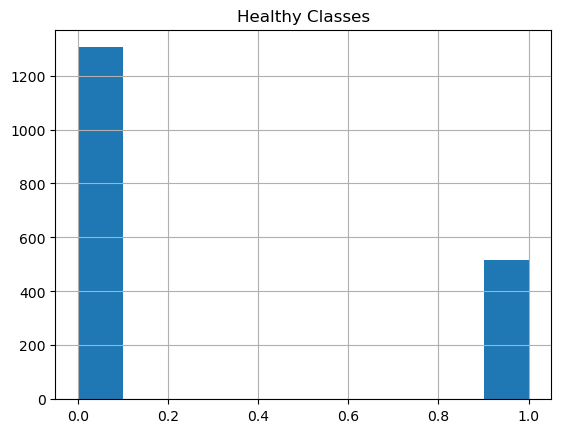

In [19]:
dataset.healthy.hist()
plt.title('Healthy Classes')

Text(0.5, 1.0, 'Multiple Diseases Classes')

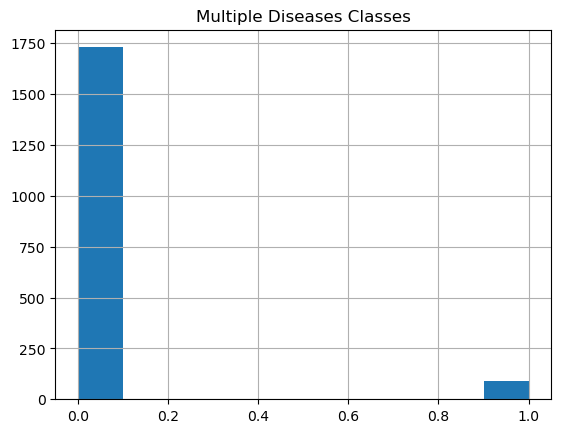

In [20]:
dataset.multiple_diseases.hist()
plt.title('Multiple Diseases Classes')

Text(0.5, 1.0, 'Rust Classes')

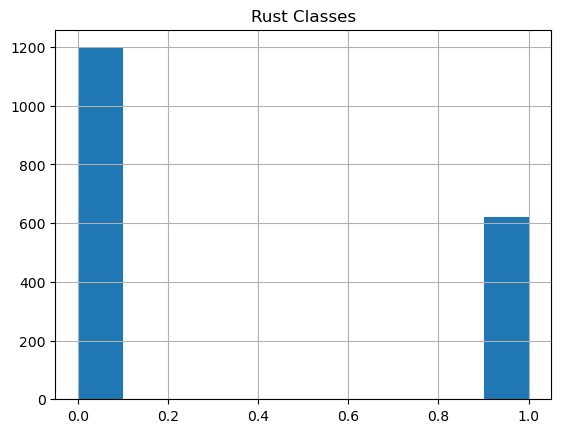

In [21]:
dataset.rust.hist()
plt.title('Rust Classes')

Text(0.5, 1.0, 'Scab Classes')

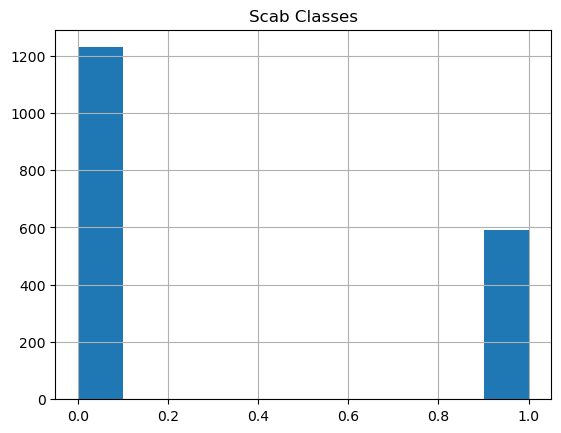

In [22]:
dataset.scab.hist()
plt.title('Scab Classes')

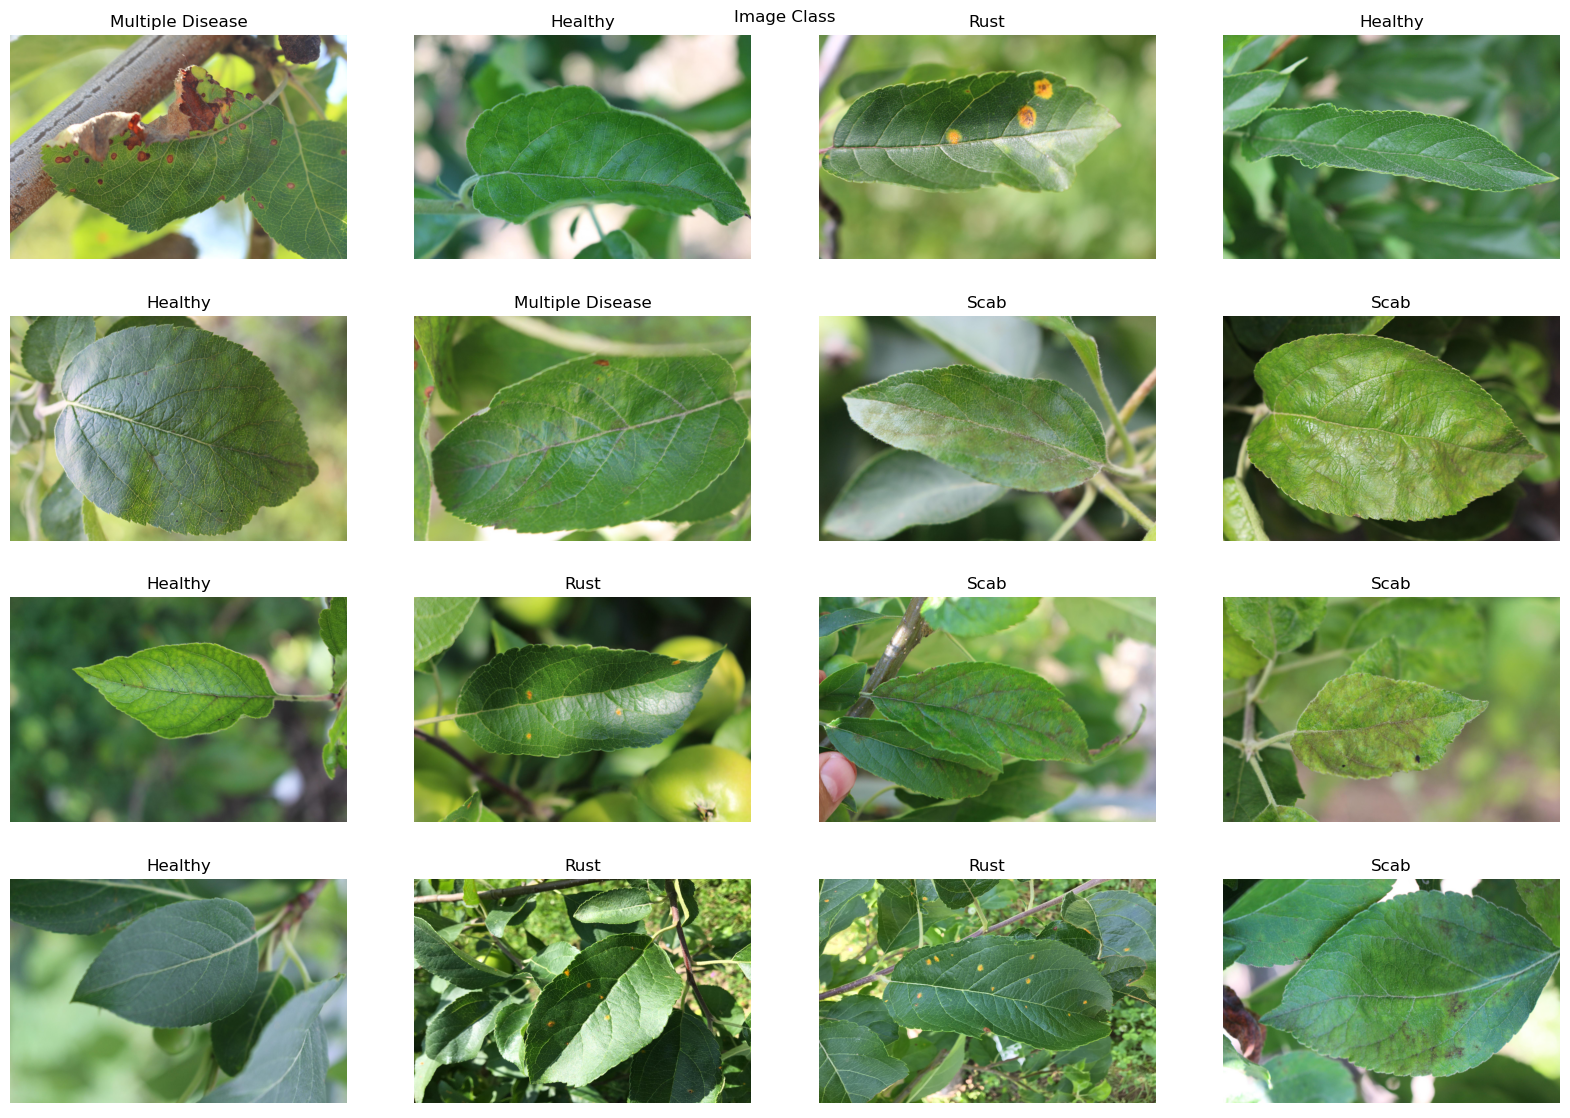

In [23]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAjEAAAGxCAYAAACTN+exAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAyaUlEQVR4nO3dfVjUZb7H8c8IwyAKk2CCKD7UobK0h9U06EE7CqylVl4tFq7ZiVo7lkbqmq6ZmK1utpqFZeXxaCc1XXe12j2ugVuZLmpq2klte9IsSyITAQWHEe7zRxfTjoiBOzN46/t1XVzX/u75zs13vkLz2d/Mj3EYY4wAAAAs06ypGwAAADgdhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGOAcsXnzZt12223q0KGDXC6X4uPjlZKSorFjxwbte+bm5srhcOjgwYP/0j7r169XZmam2rVrp4iICLndbqWmpmrevHk6evSor65Tp066++67/8WuAdiCEAOcA/73f/9XqampKisr08yZM5Wfn69nnnlG1157rZYvX97U7Z3SlClTdMMNN+jrr7/WtGnTVFBQoGXLlqlv377Kzc3Vo48+2tQtAmgi4U3dAIDgmzlzpjp37qw333xT4eE//trfcccdmjlzZhN2dmorVqzQ448/ruzsbM2fP18Oh8N3W//+/TV+/Hht3LixCTsE0JQ4EwOcA77//nu1bt3aL8DUatas7n8Gli5dqpSUFLVs2VItW7bUlVdeqQULFvhuLygo0C233KL27dsrMjJS//Zv/6YRI0bU+7LRV199pcGDBysmJkZut1u//OUv9d133/1k348//rhatWqlZ5991i/A1IqOjlZ6enq99z927JjGjh2rK6+8Um63W7GxsUpJSdHrr79ep3bFihXq1auX3G63oqKidMEFF+iee+7x3V5TU6MnnnhCF198sZo3b67zzjtPl19+uZ555hm/fT799FNlZWWpTZs2crlc6tKli5577jm/mobuBeDUOBMDnANSUlL0X//1Xxo9erSGDh2qn/3sZ3I6nSetfeyxxzRt2jQNHjxYY8eOldvt1s6dO7Vv3z5fzeeff66UlBTde++9crvd+uKLLzR79mxdd911+vDDD+vsfdtttykzM1P333+/du3apcmTJ2v37t3avHlzvX0cOHBAO3fu1JAhQxQVFXVaj9vj8ejQoUMaN26c2rVrp6qqKq1du1aDBw/WwoULddddd0mSNm7cqCFDhmjIkCHKzc1VZGSk9u3bp7feesu318yZM30vX91www3yer36xz/+ocOHD/tqdu/erdTUVHXo0EGzZs1SQkKC3nzzTY0ePVoHDx7UlClTGrwXgAYwAM56Bw8eNNddd52RZCQZp9NpUlNTzYwZM0x5ebmvbs+ePSYsLMwMHTq0wXvX1NQYr9dr9u3bZySZ119/3XfblClTjCTz8MMP+91nyZIlRpJZvHhxvftu2rTJSDITJkxocC8dO3Y0w4cPr/f248ePG6/Xa7Kzs81VV13lW//9739vJJnDhw/Xe98BAwaYK6+88pTfPyMjw7Rv396Ulpb6rT/44IMmMjLSHDp0qMF7AfhpvJwEnAPi4uK0fv16bdmyRb/73e90yy236JNPPtHEiRPVrVs338tABQUFqq6u1gMPPHDK/YqLi3X//fcrKSlJ4eHhcjqd6tixoyTpo48+qlM/dOhQv+PMzEyFh4fr7bffDtAjrN+KFSt07bXXqmXLlr5eFyxY4Nfn1Vdf7evrD3/4g77++us6+/Ts2VMffPCBRo4cqTfffFNlZWV+tx87dkx/+9vfdNtttykqKkrHjx/3fd100006duyYNm3a1KC9ADQMIQY4h/To0UOPPPKIVqxYoW+++UYPP/ywvvjiC9+be2vfp9K+fft696ipqVF6erpWrlyp8ePH629/+5vee+893xN0ZWVlnfskJCT4HYeHhysuLk7ff/99vd+nQ4cOkqS9e/c27kH+k5UrV/ouzV68eLE2btyoLVu26J577tGxY8d8dTfccINee+01HT9+XHfddZfat2+vrl276tVXX/XVTJw4Ub///e+1adMm9e/fX3Fxcerbt6+2bt0q6Yf3HR0/flx5eXlyOp1+XzfddJMk+cLiT+0FoIGa+lQQgKZz+PBhI8n079/fGGPMiy++aCSZwsLCeu/zwQcfGElm0aJFfuuffvqpkWSmTJniW6t9OWnr1q1+tV6v14SHh5vs7OxT9tetWzfTqlUrc/To0QY9nhNfTrrttttM586dTU1NjV/d0KFDTX3/+Tt27Jh55513TEZGRr2zKCkpMStWrDDJyckmNjbWHD161Bw9etSEhYWZu+++22zZsuWkXwcPHmzQXgAahjMxwDngwIEDJ12vfUklMTFRkpSenq6wsDDNmzev3r1qrxJyuVx+6y+++GK991myZInf8R/+8AcdP35cffr0OWXfkydPVklJiUaPHi1jTJ3bjxw5ovz8/FP2GhER4XdlU1FR0UmvTqrlcrnUu3dvPfnkk5Kk7du316k577zzdPvtt+uBBx7QoUOH9MUXXygqKko33nijtm/frssvv1w9evSo8xUXF9egvQA0DFcnAeeAjIwMtW/fXgMHDtQll1yimpoa7dixQ7NmzVLLli310EMPSfrhL97+5je/0bRp01RZWak777xTbrdbu3fv1sGDBzV16lRdcskluvDCCzVhwgQZYxQbG6s///nPKigoqPf7r1y5UuHh4UpLS/NdnXTFFVcoMzPzlH3/4he/0OTJkzVt2jT94x//UHZ2ti688EJVVFRo8+bNevHFFzVkyJB6L7MeMGCAVq5cqZEjR+r222/XV199pWnTpqlt27b69NNPfXWPPfaY9u/fr759+6p9+/Y6fPiwnnnmGTmdTvXu3VuSNHDgQHXt2lU9evTQ+eefr3379mnOnDnq2LGjkpOTJUnPPPOMrrvuOl1//fX6z//8T3Xq1Enl5eX67LPP9Oc//9l3tVND9gLQAE19KghA8C1fvtxkZWWZ5ORk07JlS+N0Ok2HDh3MsGHDzO7du+vU/8///I+5+uqrTWRkpGnZsqW56qqrzMKFC323796926SlpZno6GjTqlUr84tf/MJ8+eWX9b6ctG3bNjNw4EDTsmVLEx0dbe68807z7bffNrj/devWmdtvv920bdvWOJ1OExMTY1JSUsxTTz1lysrKfHUnuzrpd7/7nenUqZNxuVymS5cuZv78+b6+av3lL38x/fv3N+3atTMRERGmTZs25qabbjLr16/31cyaNcukpqaa1q1bm4iICNOhQweTnZ1tvvjiC7/vt3fvXnPPPfeYdu3aGafTac4//3yTmppqnnjiiUbvBeDUHMac5BwtAADAGY73xAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWOms/WN3NTU1+uabbxQdHe331zoBAMCZyxij8vJyJSYmqlmzU59rOWtDzDfffKOkpKSmbgMAAJyGr7766pQfRiudxSEmOjpa0g9DiImJCejeXq9X+fn5Sk9Pl9PpDOje+BFzDg3mHBrMOTSYc+gEa9ZlZWVKSkryPY+fylkbYmpfQoqJiQlKiImKilJMTAy/JEHEnEODOYcGcw4N5hw6wZ51Q94Kwht7AQCAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKwU3tQN2Kxr7pvyVP/0R4WfKb743c1N3QIAAAHDmRgAAGAlQgwAALASIQYAAFiJEAMAAKzU6BDz7rvvauDAgUpMTJTD4dBrr73mu83r9eqRRx5Rt27d1KJFCyUmJuquu+7SN99847eHx+PRqFGj1Lp1a7Vo0UKDBg3S/v37/WpKSko0bNgwud1uud1uDRs2TIcPHz6tBwkAAM4+jQ4xR48e1RVXXKG5c+fWua2iokLvv/++Jk+erPfff18rV67UJ598okGDBvnV5eTkaNWqVVq2bJk2bNigI0eOaMCAAaqurvbVZGVlaceOHVqzZo3WrFmjHTt2aNiwYafxEAEAwNmo0ZdY9+/fX/379z/pbW63WwUFBX5reXl56tmzp7788kt16NBBpaWlWrBggV555RX169dPkrR48WIlJSVp7dq1ysjI0EcffaQ1a9Zo06ZN6tWrlyRp/vz5SklJ0ccff6yLL764sW0DAICzTND/TkxpaakcDofOO+88SdK2bdvk9XqVnp7uq0lMTFTXrl1VWFiojIwMbdy4UW632xdgJOmaa66R2+1WYWHhSUOMx+ORx+PxHZeVlUn64SUur9cb0MdUu5+rmQnovsEW6DkEW22/tvVtG+YcGsw5NJhz6ARr1o3ZL6gh5tixY5owYYKysrIUExMjSSoqKlJERIRatWrlVxsfH6+ioiJfTZs2bers16ZNG1/NiWbMmKGpU6fWWc/Pz1dUVNS/+lBOalqPmqDsGyyrV69u6hZOy4ln9xAczDk0mHNoMOfQCfSsKyoqGlwbtBDj9Xp1xx13qKamRs8///xP1htj5HD8+Ndv//l/11fzzyZOnKgxY8b4jsvKypSUlKT09HRfgAoUr9ergoICTd7aTJ4ae/5i787cjKZuoVFq55yWlian09nU7Zy1mHNoMOfQYM6hE6xZ176S0hBBCTFer1eZmZnau3ev3nrrLb8QkZCQoKqqKpWUlPidjSkuLlZqaqqv5ttvv62z73fffaf4+PiTfk+XyyWXy1Vn3el0Bu0H2VPjsOpjB2z9hQ7mvyF+xJxDgzmHBnMOnUDPujF7BfzvxNQGmE8//VRr165VXFyc3+3du3eX0+n0O/104MAB7dy50xdiUlJSVFpaqvfee89Xs3nzZpWWlvpqAADAua3RZ2KOHDmizz77zHe8d+9e7dixQ7GxsUpMTNTtt9+u999/X3/5y19UXV3tew9LbGysIiIi5Ha7lZ2drbFjxyouLk6xsbEaN26cunXr5rtaqUuXLvr5z3+u++67Ty+++KIk6Ve/+pUGDBjAlUkAAEDSaYSYrVu36sYbb/Qd174PZfjw4crNzdUbb7whSbryyiv97vf222+rT58+kqSnn35a4eHhyszMVGVlpfr27atFixYpLCzMV79kyRKNHj3adxXToEGDTvq3aQAAwLmp0SGmT58+Mqb+S4tPdVutyMhI5eXlKS8vr96a2NhYLV68uLHtAQCAcwSfnQQAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGClRoeYd999VwMHDlRiYqIcDodee+01v9uNMcrNzVViYqKaN2+uPn36aNeuXX41Ho9Ho0aNUuvWrdWiRQsNGjRI+/fv96spKSnRsGHD5Ha75Xa7NWzYMB0+fLjRDxAAAJydGh1ijh49qiuuuEJz58496e0zZ87U7NmzNXfuXG3ZskUJCQlKS0tTeXm5ryYnJ0erVq3SsmXLtGHDBh05ckQDBgxQdXW1ryYrK0s7duzQmjVrtGbNGu3YsUPDhg07jYcIAADORuGNvUP//v3Vv3//k95mjNGcOXM0adIkDR48WJL08ssvKz4+XkuXLtWIESNUWlqqBQsW6JVXXlG/fv0kSYsXL1ZSUpLWrl2rjIwMffTRR1qzZo02bdqkXr16SZLmz5+vlJQUffzxx7r44otP9/ECAICzRKNDzKns3btXRUVFSk9P9625XC717t1bhYWFGjFihLZt2yav1+tXk5iYqK5du6qwsFAZGRnauHGj3G63L8BI0jXXXCO3263CwsKThhiPxyOPx+M7LisrkyR5vV55vd5APkzffq5mJqD7Blug5xBstf3a1rdtmHNoMOfQYM6hE6xZN2a/gIaYoqIiSVJ8fLzfenx8vPbt2+eriYiIUKtWrerU1N6/qKhIbdq0qbN/mzZtfDUnmjFjhqZOnVpnPT8/X1FRUY1/MA0wrUdNUPYNltWrVzd1C6eloKCgqVs4JzDn0GDOocGcQyfQs66oqGhwbUBDTC2Hw+F3bIyps3aiE2tOVn+qfSZOnKgxY8b4jsvKypSUlKT09HTFxMQ0pv2f5PV6VVBQoMlbm8lTc+rHdSbZmZvR1C00Su2c09LS5HQ6m7qdsxZzDg3mHBrMOXSCNevaV1IaIqAhJiEhQdIPZ1Latm3rWy8uLvadnUlISFBVVZVKSkr8zsYUFxcrNTXVV/Ptt9/W2f+7776rc5anlsvlksvlqrPudDqD9oPsqXHIU21PiLH1FzqY/4b4EXMODeYcGsw5dAI968bsFdC/E9O5c2clJCT4nVqqqqrSunXrfAGle/fucjqdfjUHDhzQzp07fTUpKSkqLS3Ve++956vZvHmzSktLfTUAAODc1ugzMUeOHNFnn33mO967d6927Nih2NhYdejQQTk5OZo+fbqSk5OVnJys6dOnKyoqSllZWZIkt9ut7OxsjR07VnFxcYqNjdW4cePUrVs339VKXbp00c9//nPdd999evHFFyVJv/rVrzRgwACuTAIAAJJOI8Rs3bpVN954o++49n0ow4cP16JFizR+/HhVVlZq5MiRKikpUa9evZSfn6/o6GjffZ5++mmFh4crMzNTlZWV6tu3rxYtWqSwsDBfzZIlSzR69GjfVUyDBg2q92/TAACAc0+jQ0yfPn1kTP2XFjscDuXm5io3N7femsjISOXl5SkvL6/emtjYWC1evLix7QEAgHMEn50EAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgpYCHmOPHj+vRRx9V586d1bx5c11wwQV6/PHHVVNT46sxxig3N1eJiYlq3ry5+vTpo127dvnt4/F4NGrUKLVu3VotWrTQoEGDtH///kC3CwAALBXwEPPkk0/qhRde0Ny5c/XRRx9p5syZeuqpp5SXl+ermTlzpmbPnq25c+dqy5YtSkhIUFpamsrLy301OTk5WrVqlZYtW6YNGzboyJEjGjBggKqrqwPdMgAAsFB4oDfcuHGjbrnlFt18882SpE6dOunVV1/V1q1bJf1wFmbOnDmaNGmSBg8eLEl6+eWXFR8fr6VLl2rEiBEqLS3VggUL9Morr6hfv36SpMWLFyspKUlr165VRkZGoNsGAACWCXiIue666/TCCy/ok08+0UUXXaQPPvhAGzZs0Jw5cyRJe/fuVVFRkdLT0333cblc6t27twoLCzVixAht27ZNXq/XryYxMVFdu3ZVYWHhSUOMx+ORx+PxHZeVlUmSvF6vvF5vQB9j7X6uZiag+wZboOcQbLX92ta3bZhzaDDn0GDOoROsWTdmv4CHmEceeUSlpaW65JJLFBYWpurqav32t7/VnXfeKUkqKiqSJMXHx/vdLz4+Xvv27fPVREREqFWrVnVqau9/ohkzZmjq1Kl11vPz8xUVFfUvP66Tmdaj5qeLziCrV69u6hZOS0FBQVO3cE5gzqHBnEODOYdOoGddUVHR4NqAh5jly5dr8eLFWrp0qS677DLt2LFDOTk5SkxM1PDhw311DofD737GmDprJzpVzcSJEzVmzBjfcVlZmZKSkpSenq6YmJh/4RHV5fV6VVBQoMlbm8lTc+qezyQ7c+16Ga52zmlpaXI6nU3dzlmLOYcGcw4N5hw6wZp17SspDRHwEPPrX/9aEyZM0B133CFJ6tatm/bt26cZM2Zo+PDhSkhIkPTD2Za2bdv67ldcXOw7O5OQkKCqqiqVlJT4nY0pLi5WamrqSb+vy+WSy+Wqs+50OoP2g+ypcchTbU+IsfUXOpj/hvgRcw4N5hwazDl0Aj3rxuwV8KuTKioq1KyZ/7ZhYWG+S6w7d+6shIQEv9NPVVVVWrdunS+gdO/eXU6n06/mwIED2rlzZ70hBgAAnFsCfiZm4MCB+u1vf6sOHTrosssu0/bt2zV79mzdc889kn54GSknJ0fTp09XcnKykpOTNX36dEVFRSkrK0uS5Ha7lZ2drbFjxyouLk6xsbEaN26cunXr5rtaCQAAnNsCHmLy8vI0efJkjRw5UsXFxUpMTNSIESP02GOP+WrGjx+vyspKjRw5UiUlJerVq5fy8/MVHR3tq3n66acVHh6uzMxMVVZWqm/fvlq0aJHCwsIC3TIAALBQwENMdHS05syZ47uk+mQcDodyc3OVm5tbb01kZKTy8vL8/kgeAABALT47CQAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYKWghJivv/5av/zlLxUXF6eoqChdeeWV2rZtm+92Y4xyc3OVmJio5s2bq0+fPtq1a5ffHh6PR6NGjVLr1q3VokULDRo0SPv37w9GuwAAwEIBDzElJSW69tpr5XQ69de//lW7d+/WrFmzdN555/lqZs6cqdmzZ2vu3LnasmWLEhISlJaWpvLycl9NTk6OVq1apWXLlmnDhg06cuSIBgwYoOrq6kC3DAAALBQe6A2ffPJJJSUlaeHChb61Tp06+f63MUZz5szRpEmTNHjwYEnSyy+/rPj4eC1dulQjRoxQaWmpFixYoFdeeUX9+vWTJC1evFhJSUlau3atMjIy6nxfj8cjj8fjOy4rK5Mkeb1eeb3egD7G2v1czUxA9w22QM8h2Gr7ta1v2zDn0GDOocGcQydYs27Mfg5jTECfiS+99FJlZGRo//79Wrdundq1a6eRI0fqvvvukyTt2bNHF154od5//31dddVVvvvdcsstOu+88/Tyyy/rrbfeUt++fXXo0CG1atXKV3PFFVfo1ltv1dSpU+t839zc3JOuL126VFFRUYF8iAAAIEgqKiqUlZWl0tJSxcTEnLI24Gdi9uzZo3nz5mnMmDH6zW9+o/fee0+jR4+Wy+XSXXfdpaKiIklSfHy83/3i4+O1b98+SVJRUZEiIiL8AkxtTe39TzRx4kSNGTPGd1xWVqakpCSlp6f/5BAay+v1qqCgQJO3NpOnxhHQvYNpZ27dM1hnsto5p6Wlyel0NnU7Zy3mHBrMOTSYc+gEa9a1r6Q0RMBDTE1NjXr06KHp06dLkq666irt2rVL8+bN01133eWrczj8n/yNMXXWTnSqGpfLJZfLVWfd6XQG7QfZU+OQp9qeEGPrL3Qw/w3xI+YcGsw5NJhz6AR61o3ZK+Ahpm3btrr00kv91rp06aI//elPkqSEhARJP5xtadu2ra+muLjYd3YmISFBVVVVKikp8TsbU1xcrNTU1EC3DABAk+s04X+buoVGcYUZzezZtD0E/Oqka6+9Vh9//LHf2ieffKKOHTtKkjp37qyEhAQVFBT4bq+qqtK6det8AaV79+5yOp1+NQcOHNDOnTsJMQAAQFIQzsQ8/PDDSk1N1fTp05WZman33ntPL730kl566SVJP7yMlJOTo+nTpys5OVnJycmaPn26oqKilJWVJUlyu93Kzs7W2LFjFRcXp9jYWI0bN07dunXzXa0EAADObQEPMVdffbVWrVqliRMn6vHHH1fnzp01Z84cDR061Fczfvx4VVZWauTIkSopKVGvXr2Un5+v6OhoX83TTz+t8PBwZWZmqrKyUn379tWiRYsUFhYW6JYBAICFAh5iJGnAgAEaMGBAvbc7HA7l5uYqNze33prIyEjl5eUpLy8vCB0CAADb8dlJAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAVgp6iJkxY4YcDodycnJ8a8YY5ebmKjExUc2bN1efPn20a9cuv/t5PB6NGjVKrVu3VosWLTRo0CDt378/2O0CAABLBDXEbNmyRS+99JIuv/xyv/WZM2dq9uzZmjt3rrZs2aKEhASlpaWpvLzcV5OTk6NVq1Zp2bJl2rBhg44cOaIBAwaouro6mC0DAABLBC3EHDlyREOHDtX8+fPVqlUr37oxRnPmzNGkSZM0ePBgde3aVS+//LIqKiq0dOlSSVJpaakWLFigWbNmqV+/frrqqqu0ePFiffjhh1q7dm2wWgYAABYJD9bGDzzwgG6++Wb169dPTzzxhG997969KioqUnp6um/N5XKpd+/eKiws1IgRI7Rt2zZ5vV6/msTERHXt2lWFhYXKyMio8/08Ho88Ho/vuKysTJLk9Xrl9XoD+thq93M1MwHdN9gCPYdgq+3Xtr5tw5xDgzmHhs1zdoXZ9ZxS+xwYrOfYhghKiFm2bJnef/99bdmypc5tRUVFkqT4+Hi/9fj4eO3bt89XExER4XcGp7am9v4nmjFjhqZOnVpnPT8/X1FRUaf1OH7KtB41Qdk3WFavXt3ULZyWgoKCpm7hnMCcQ4M5h4aNc57Zs6k7OD2BnnVFRUWDawMeYr766is99NBDys/PV2RkZL11DofD79gYU2ftRKeqmThxosaMGeM7LisrU1JSktLT0xUTE9OIR/DTvF6vCgoKNHlrM3lqTt3zmWRnbt0zWGey2jmnpaXJ6XQ2dTtnLeYcGsw5NGyec9fcN5u6hUZxNTOa1qMm4LOufSWlIQIeYrZt26bi4mJ1797dt1ZdXa13331Xc+fO1ccffyzph7Mtbdu29dUUFxf7zs4kJCSoqqpKJSUlfmdjiouLlZqaetLv63K55HK56qw7nc6g/SB7ahzyVNsTYmz7ha4VzH9D/Ig5hwZzDg0b52zT88k/C/SsG7NXwN/Y27dvX3344YfasWOH76tHjx4aOnSoduzYoQsuuEAJCQl+p5+qqqq0bt06X0Dp3r27nE6nX82BAwe0c+fOekMMAAA4twT8TEx0dLS6du3qt9aiRQvFxcX51nNycjR9+nQlJycrOTlZ06dPV1RUlLKysiRJbrdb2dnZGjt2rOLi4hQbG6tx48apW7du6tevX6BbBgAAFgra1UmnMn78eFVWVmrkyJEqKSlRr169lJ+fr+joaF/N008/rfDwcGVmZqqyslJ9+/bVokWLFBYW1hQtAwCAM0xIQsw777zjd+xwOJSbm6vc3Nx67xMZGam8vDzl5eUFtzkAAGAlPjsJAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASgEPMTNmzNDVV1+t6OhotWnTRrfeeqs+/vhjvxpjjHJzc5WYmKjmzZurT58+2rVrl1+Nx+PRqFGj1Lp1a7Vo0UKDBg3S/v37A90uAACwVMBDzLp16/TAAw9o06ZNKigo0PHjx5Wenq6jR4/6ambOnKnZs2dr7ty52rJlixISEpSWlqby8nJfTU5OjlatWqVly5Zpw4YNOnLkiAYMGKDq6upAtwwAACwUHugN16xZ43e8cOFCtWnTRtu2bdMNN9wgY4zmzJmjSZMmafDgwZKkl19+WfHx8Vq6dKlGjBih0tJSLViwQK+88or69esnSVq8eLGSkpK0du1aZWRkBLptAABgmYCHmBOVlpZKkmJjYyVJe/fuVVFRkdLT0301LpdLvXv3VmFhoUaMGKFt27bJ6/X61SQmJqpr164qLCw8aYjxeDzyeDy+47KyMkmS1+uV1+sN6GOq3c/VzAR032AL9ByCrbZf2/q2DXMODeYcGjbP2RVm13NK7XNgsJ5jGyKoIcYYozFjxui6665T165dJUlFRUWSpPj4eL/a+Ph47du3z1cTERGhVq1a1ampvf+JZsyYoalTp9ZZz8/PV1RU1L/8WE5mWo+aoOwbLKtXr27qFk5LQUFBU7dwTmDOocGcQ8PGOc/s2dQdnJ5Az7qioqLBtUENMQ8++KD+7//+Txs2bKhzm8Ph8Ds2xtRZO9GpaiZOnKgxY8b4jsvKypSUlKT09HTFxMScRvf183q9Kigo0OStzeSpOXXPZ5KduXa9DFc757S0NDmdzqZu56zFnEODOYeGzXPumvtmU7fQKK5mRtN61AR81rWvpDRE0ELMqFGj9MYbb+jdd99V+/btfesJCQmSfjjb0rZtW996cXGx7+xMQkKCqqqqVFJS4nc2pri4WKmpqSf9fi6XSy6Xq8660+kM2g+yp8YhT7U9Ica2X+hawfw3xI+Yc2gw59Cwcc42PZ/8s0DPujF7BfzqJGOMHnzwQa1cuVJvvfWWOnfu7Hd7586dlZCQ4Hf6qaqqSuvWrfMFlO7du8vpdPrVHDhwQDt37qw3xAAAgHNLwM/EPPDAA1q6dKlef/11RUdH+97D4na71bx5czkcDuXk5Gj69OlKTk5WcnKypk+frqioKGVlZflqs7OzNXbsWMXFxSk2Nlbjxo1Tt27dfFcrAQCAc1vAQ8y8efMkSX369PFbX7hwoe6++25J0vjx41VZWamRI0eqpKREvXr1Un5+vqKjo331Tz/9tMLDw5WZmanKykr17dtXixYtUlhYWKBbBgAAFgp4iDHmpy8Rczgcys3NVW5ubr01kZGRysvLU15eXgC7AwAAZws+OwkAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKhBgAAGAlQgwAALASIQYAAFiJEAMAAKxEiAEAAFYixAAAACsRYgAAgJUIMQAAwEqEGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABYiRADAACsRIgBAABWIsQAAAArEWIAAICVCDEAAMBKZ3yIef7559W5c2dFRkaqe/fuWr9+fVO3BAAAzgBndIhZvny5cnJyNGnSJG3fvl3XX3+9+vfvry+//LKpWwMAAE3sjA4xs2fPVnZ2tu6991516dJFc+bMUVJSkubNm9fUrQEAgCYW3tQN1Keqqkrbtm3ThAkT/NbT09NVWFhYp97j8cjj8fiOS0tLJUmHDh2S1+sNaG9er1cVFRUK9zZTdY0joHsH0/fff9/ULTRK7Zy///57OZ3Opm7nrMWcQ4M5h4bNcw4/frSpW2iU8BqjioqagM+6vLxckmSM+ekeAvZdA+zgwYOqrq5WfHy833p8fLyKiorq1M+YMUNTp06ts965c+eg9Wib1rOaugMAwNkkK4h7l5eXy+12n7LmjA0xtRwO/zMdxpg6a5I0ceJEjRkzxndcU1OjQ4cOKS4u7qT1/4qysjIlJSXpq6++UkxMTED3xo+Yc2gw59BgzqHBnEMnWLM2xqi8vFyJiYk/WXvGhpjWrVsrLCyszlmX4uLiOmdnJMnlcsnlcvmtnXfeecFsUTExMfyShABzDg3mHBrMOTSYc+gEY9Y/dQam1hn7xt6IiAh1795dBQUFfusFBQVKTU1toq4AAMCZ4ow9EyNJY8aM0bBhw9SjRw+lpKTopZde0pdffqn777+/qVsDAABN7IwOMUOGDNH333+vxx9/XAcOHFDXrl21evVqdezYsUn7crlcmjJlSp2XrxBYzDk0mHNoMOfQYM6hcybM2mEacg0TAADAGeaMfU8MAADAqRBiAACAlQgxAADASoQYAABgJUIMAACwEiGmHs8//7w6d+6syMhIde/eXevXrz9l/bp169S9e3dFRkbqggsu0AsvvBCiTu3WmDmvXLlSaWlpOv/88xUTE6OUlBS9+eabIezWXo39ea7197//XeHh4bryyiuD2+BZorFz9ng8mjRpkjp27CiXy6ULL7xQ//3f/x2ibu3V2DkvWbJEV1xxhaKiotS2bVv9x3/8h3UfiBtq7777rgYOHKjExEQ5HA699tprP3mfJnkeNKhj2bJlxul0mvnz55vdu3ebhx56yLRo0cLs27fvpPV79uwxUVFR5qGHHjK7d+828+fPN06n0/zxj38Mced2aeycH3roIfPkk0+a9957z3zyySdm4sSJxul0mvfffz/EndulsXOudfjwYXPBBReY9PR0c8UVV4SmWYudzpwHDRpkevXqZQoKCszevXvN5s2bzd///vcQdm2fxs55/fr1plmzZuaZZ54xe/bsMevXrzeXXXaZufXWW0PcuV1Wr15tJk2aZP70pz8ZSWbVqlWnrG+q50FCzEn07NnT3H///X5rl1xyiZkwYcJJ68ePH28uueQSv7URI0aYa665Jmg9ng0aO+eTufTSS83UqVMD3dpZ5XTnPGTIEPPoo4+aKVOmEGIaoLFz/utf/2rcbrf5/vvvQ9HeWaOxc37qqafMBRdc4Lf27LPPmvbt2wetx7NNQ0JMUz0P8nLSCaqqqrRt2zalp6f7raenp6uwsPCk99m4cWOd+oyMDG3dulVerzdovdrsdOZ8opqaGpWXlys2NjYYLZ4VTnfOCxcu1Oeff64pU6YEu8WzwunM+Y033lCPHj00c+ZMtWvXThdddJHGjRunysrKULRspdOZc2pqqvbv36/Vq1fLGKNvv/1Wf/zjH3XzzTeHouVzRlM9D57RHzvQFA4ePKjq6uo6n5QdHx9f5xO1axUVFZ20/vjx4zp48KDatm0btH5tdTpzPtGsWbN09OhRZWZmBqPFs8LpzPnTTz/VhAkTtH79eoWH85+IhjidOe/Zs0cbNmxQZGSkVq1apYMHD2rkyJE6dOgQ74upx+nMOTU1VUuWLNGQIUN07NgxHT9+XIMGDVJeXl4oWj5nNNXzIGdi6uFwOPyOjTF11n6q/mTr8NfYOdd69dVXlZubq+XLl6tNmzbBau+s0dA5V1dXKysrS1OnTtVFF10UqvbOGo35ea6pqZHD4dCSJUvUs2dP3XTTTZo9e7YWLVrE2Zif0Jg57969W6NHj9Zjjz2mbdu2ac2aNdq7dy8fJBwETfE8yP/NOkHr1q0VFhZWJ9UXFxfXSZm1EhISTlofHh6uuLi4oPVqs9OZc63ly5crOztbK1asUL9+/YLZpvUaO+fy8nJt3bpV27dv14MPPijphydbY4zCw8OVn5+vf//3fw9J7zY5nZ/ntm3bql27dnK73b61Ll26yBij/fv3Kzk5Oag92+h05jxjxgxde+21+vWvfy1Juvzyy9WiRQtdf/31euKJJzhTHiBN9TzImZgTREREqHv37iooKPBbLygoUGpq6knvk5KSUqc+Pz9fPXr0kNPpDFqvNjudOUs/nIG5++67tXTpUl7TboDGzjkmJkYffvihduzY4fu6//77dfHFF2vHjh3q1atXqFq3yun8PF977bX65ptvdOTIEd/aJ598ombNmql9+/ZB7ddWpzPniooKNWvm/1QXFhYm6cczBfjXNdnzYFDfNmyp2kv4FixYYHbv3m1ycnJMixYtzBdffGGMMWbChAlm2LBhvvraS8sefvhhs3v3brNgwQIusW6Axs556dKlJjw83Dz33HPmwIEDvq/Dhw831UOwQmPnfCKuTmqYxs65vLzctG/f3tx+++1m165dZt26dSY5Odnce++9TfUQrNDYOS9cuNCEh4eb559/3nz++edmw4YNpkePHqZnz55N9RCsUF5ebrZv3262b99uJJnZs2eb7du3+y5lP1OeBwkx9XjuuedMx44dTUREhPnZz35m1q1b57tt+PDhpnfv3n7177zzjrnqqqtMRESE6dSpk5k3b16IO7ZTY+bcu3dvI6nO1/Dhw0PfuGUa+/P8zwgxDdfYOX/00UemX79+pnnz5qZ9+/ZmzJgxpqKiIsRd26exc3722WfNpZdeapo3b27atm1rhg4davbv3x/iru3y9ttvn/K/t2fK86DDGM6nAQAA+/CeGAAAYCVCDAAAsBIhBgAAWIkQAwAArESIAQAAViLEAAAAKxFiAACAlQgxAADASoQYAABgJUIMAACwEiEGAABY6f8BVaP8IfkN+O4AAAAASUVORK5CYII=import os

w = 10
h = 10
fig = plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.title('Image Class')
plt.axis('off')

# Assuming images are in the 'images' folder inside the 'plant' folder
plant_directory = './plant/'
image_directory = os.path.join(plant_directory, 'images')

for i in range(1, columns * rows + 1):
    # Construct the full path to the image
    img_path = os.path.join(image_directory, f'Train_{i}.jpg')

    # Check if the file exists before attempting to read it
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        fig.add_subplot(rows, columns, i)

        if dataset.healthy[i] == 1:
            plt.title('Healthy')
        elif dataset.multiple_diseases[i] == 1:
            plt.title('Multiple Disease')
        elif dataset.rust[i] == 1:
            plt.title('Rust')
        else:
            plt.title('Scab')
        plt.imshow(img)
        plt.axis('off')
    else:
        print(f"File not found: {img_path}")

plt.show()

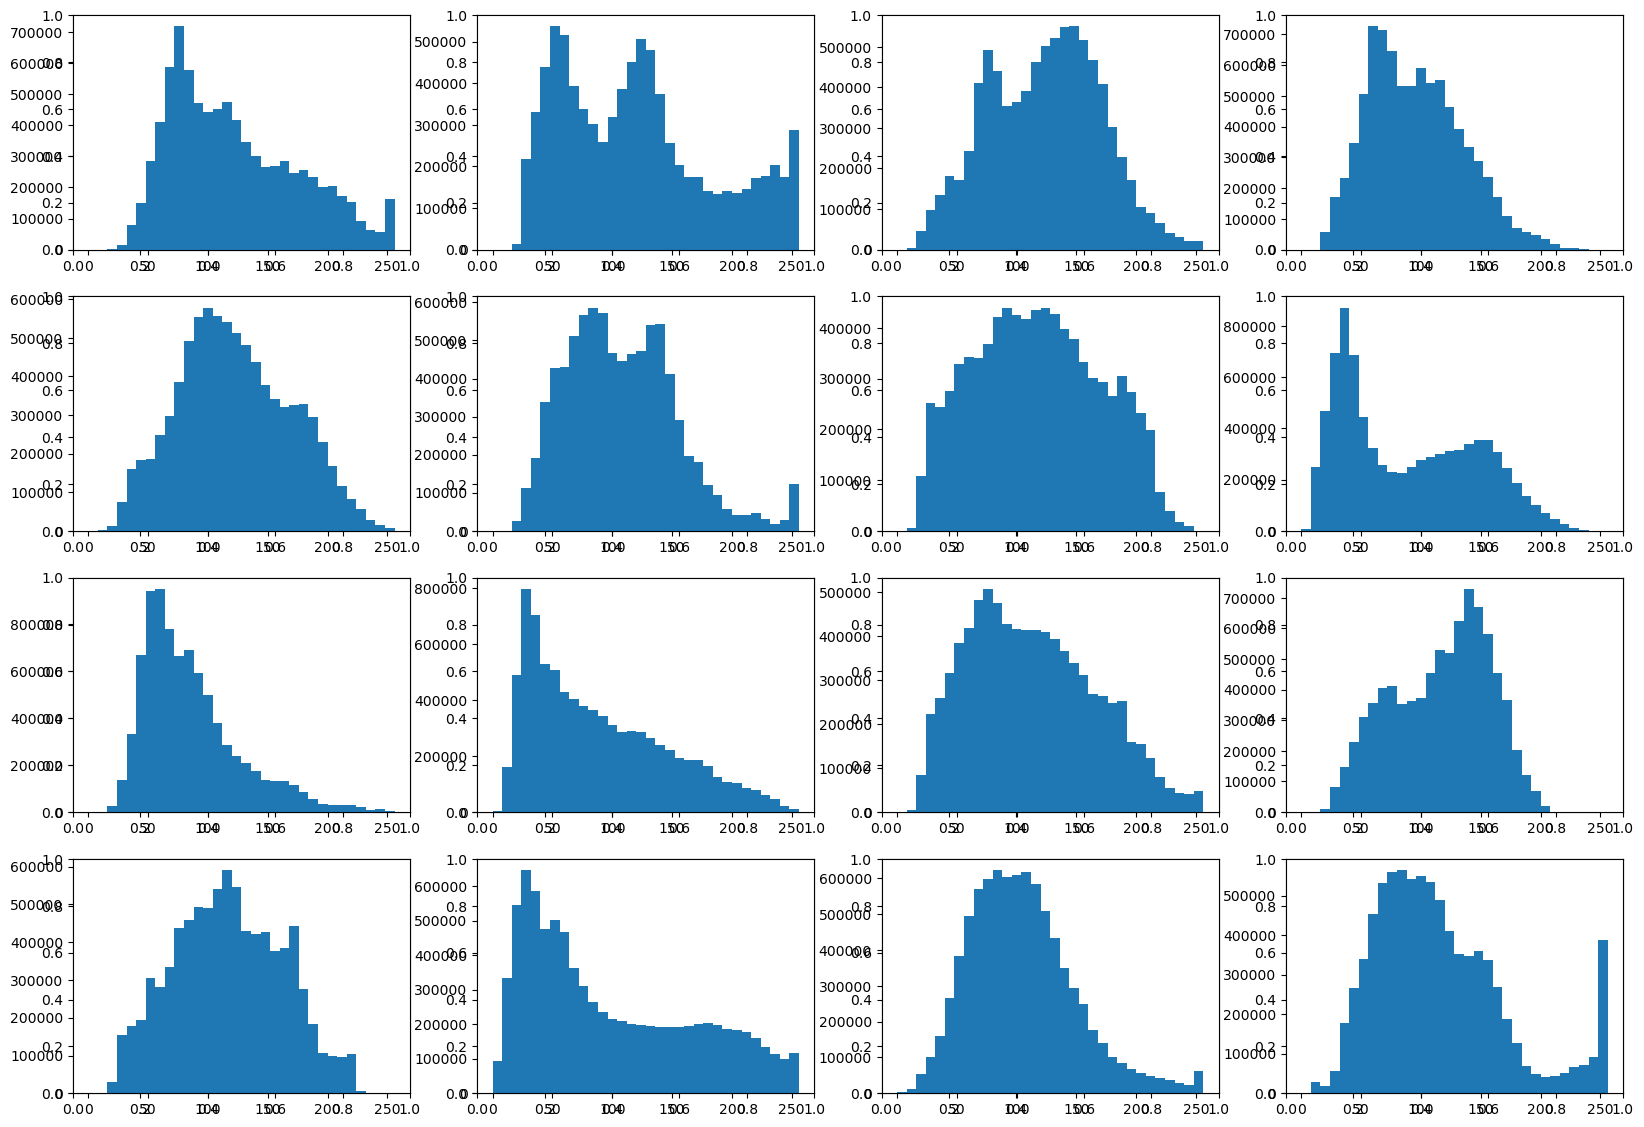

In [25]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 4
rows = 4
plt.axis('off')
plant_directory = './plant/'
image_directory = os.path.join(plant_directory, 'images')
for i in range(1, columns*rows +1):
    img_path = os.path.join(image_directory, f'Train_{i}.jpg')

    # Check if the file exists before attempting to read it
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        fig.add_subplot(rows, columns, i)
    fig.add_subplot(rows, columns, i)
    plt.hist(img.ravel(), bins=32, range=[0, 256])
plt.show()

In [26]:
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.15, # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

In [27]:
X_train, X_valid = train_test_split(dataset, test_size=0.05, shuffle=False)

In [28]:
BATCH_SIZE = 8

train_generator = datagen.flow_from_dataframe(dataset,
                    directory='plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

valid_generator = datagen.flow_from_dataframe(X_valid,
                    directory='plant/images/',
                    x_col='image_id',
                    y_col=['healthy', 'multiple_diseases', 'rust', 'scab'] ,
                    target_size=(512, 512),
                    class_mode='raw',
                    batch_size=BATCH_SIZE, shuffle=False)

Found 1821 validated image filenames.
Found 92 validated image filenames.


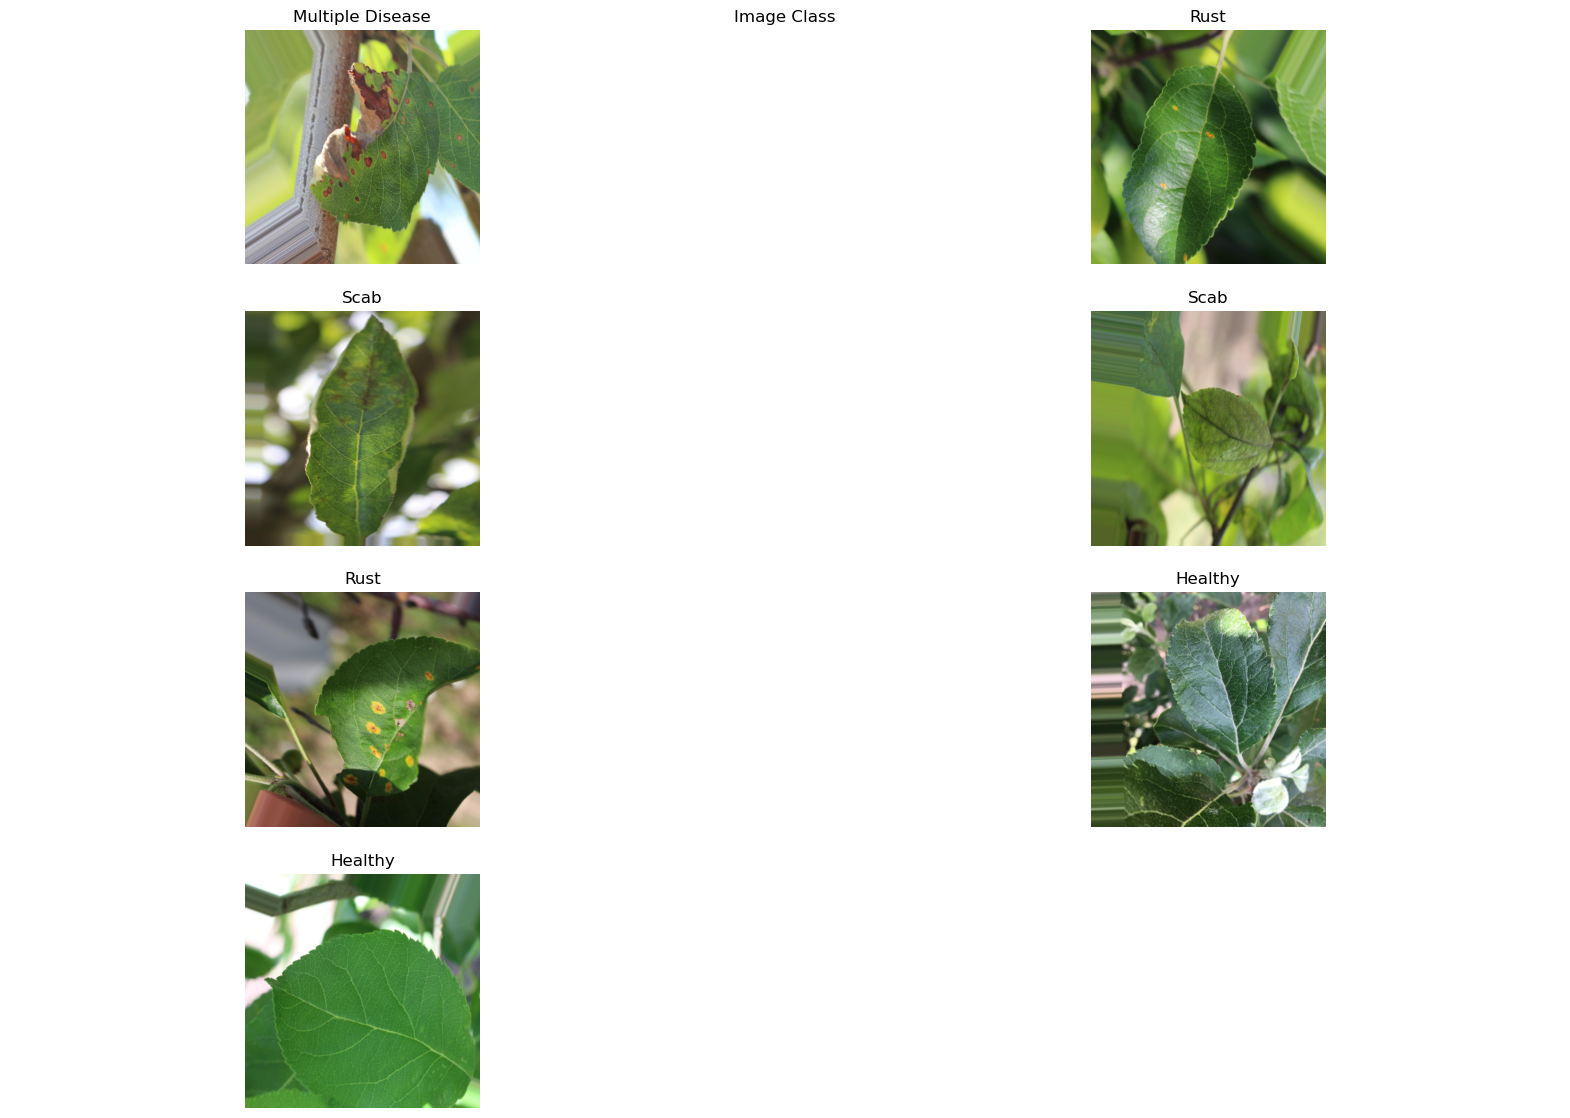

In [29]:
w=10
h=10
fig=plt.figure(figsize=(20, 14))
columns = 2
rows = 4
plt.title('Image Class')
plt.axis('off')
for i in range(1, columns*rows):

    img_batch, label_batch = train_generator.next()
    fig.add_subplot(rows, columns, i)

    if label_batch[i][0] == 1:
        plt.title('Healthy')
    elif label_batch[i][1] == 1:
        plt.title('Multiple Disease')
    elif label_batch[i][2] == 1:
        plt.title('Rust')
    else:
        plt.title('Scab')

    plt.imshow(img_batch[i])
    plt.axis('off')
plt.show()


In [30]:
print("DataFrame head:")
print(dataset.head())

img_batch, label_batch = train_generator.next()
print("Label batch shape:", label_batch.shape)
print("Label batch:", label_batch)

DataFrame head:
      image_id  healthy  multiple_diseases  rust  scab
0  Train_0.jpg        0                  0     0     1
1  Train_1.jpg        0                  1     0     0
2  Train_2.jpg        1                  0     0     0
3  Train_3.jpg        0                  0     1     0
4  Train_4.jpg        1                  0     0     0
Label batch shape: (8, 4)
Label batch: [[0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 1 0 0]
 [1 0 0 0]]


In [32]:
xception_model = tf.keras.models.Sequential([
  tf.keras.applications.xception.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 20869676 (79.61 MB)
Trainable params: 20815148 (79.40 MB)
Non-trainable params: 54528 (213.00 KB)
_________________________________________________________________


In [33]:
densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.densenet.DenseNet121(include_top=False, weights='imagenet',input_shape=(512, 512, 3)),
   tf.keras.layers.GlobalAveragePooling2D(),
   tf.keras.layers.Dense(4,activation='softmax')
])
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 global_average_pooling2d_2  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 7041604 (26.86 MB)
Trainable params: 6957956 (26.54 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [34]:
inputs = tf.keras.Input(shape=(512, 512, 3))

xception_output = xception_model(inputs)
densenet_output = densenet_model(inputs)

outputs = tf.keras.layers.average([densenet_output, xception_output])


model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 4)                    7041604   ['input_4[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 4)                    2086967   ['input_4[0][0]']             
                                                          6                                       
                                                                                                  
 average (Average)           (None, 4)                    0         ['sequential_2[0][0]',    

Learning rate schedule: 1e-05 to 0.0001 to 1e-05


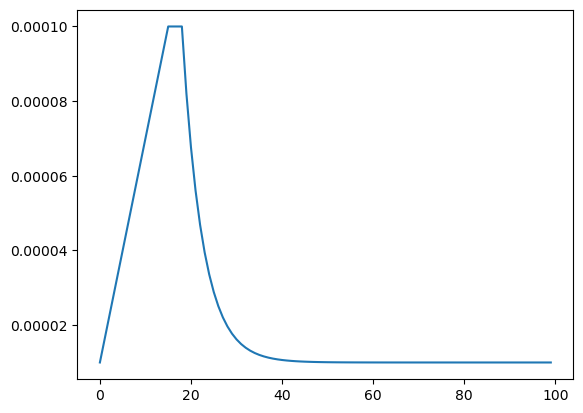

In [35]:
LR_START = 0.00001
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_RAMPUP_EPOCHS = 15
LR_SUSTAIN_EPOCHS = 3
LR_EXP_DECAY = .8
EPOCHS = 100

def lrfn(epoch):
    if epoch < LR_RAMPUP_EPOCHS:
        lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
    elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lrfn(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))

In [36]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True)

# Tensordash is used for getting live model training status, like accuracy or loss, in your phone, sure to checkout here: https://github.com/CleanPegasus/TensorDash
#histories = Tensordash(
   # email = secret_value_0,
   # password = secret_value_1,
#    ModelName = "Plant Disease Model")